<h1 align="center" style="color:green"> Natural Language Processing Task#1</h1>



### Odd Problem
#### In this problem, you are required to design a DFA and NFA that recognizes the following pattern (10101) in a string of 0s and 1s taking into consideration the overlapping.
#### Then use your graphs to develop the following 2 functions:
1. DFA_count(input) Takes the input string and returns the number of occurrences of (10101) in that input using the DFA that you designed taking into consideration the overlapping.
2. NFA_count(input) Takes the input string and returns the number of occurrences of (10101) in that input using the NFA that you designed string using taking into consideration the overlapping.
#### Test Cases
• 101011 -> Count = 1
• 11111 -> Count = 0
• 10101010101 -> Count = 4
• 110101011 -> Count = 2

### NFA Design and Transition Table

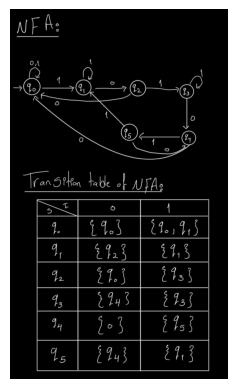

In [13]:
from skimage.io import imshow,imread
import matplotlib.pyplot as plt
img = imread('NFA.png')
plt.figure()
plt.axis('off')
plt.imshow(img)
plt.show()

***
### NFA Class
***

In [14]:
class NFA:
	# Nondeterministic-Finite-Automata for detecting the pattern: (10101)
	def __init__(self,string_of_0s_1s):
		self.sigma = string_of_0s_1s
		self.iter = -1
		self.num_of_occurrences = 0
		self.Accepted = False

	def initiate(self):
		self.state_q0()

	# preventing the tree from growing exponentially
	def dead_state(self):
		print("Dead Path")


	def state_q0(self):
		self.iter += 1
		if self.sigma[self.iter] == '1':
			self.state_q1()
			self.dead_state()
		else:
			self.state_q0()

	def state_q1(self):
		self.iter += 1
		if len(self.sigma[self.iter:]) == 0:
			print("String not accepted")
		else:
			if self.sigma[self.iter] == '0':
				self.state_q2()
			else:
				self.state_q1()

	def state_q2(self):
		self.iter += 1
		if len(self.sigma[self.iter:]) == 0:
			print("String not accepted")
		else:
			if self.sigma[self.iter] == '1':
				self.state_q3()
			else:
				self.state_q0() # overlapping...

	def state_q3(self):
		self.iter += 1

		if len(self.sigma[self.iter:]) == 0:
			print("String not accepted")
		else:
			if self.sigma[self.iter] == '0':
				self.state_q4()
			else:
				self.state_q3()

	def state_q4(self):
		self.iter += 1

		if len(self.sigma[self.iter:]) == 0:
			print("String not accepted")
		else:
			if self.sigma[self.iter] == '1':
				self.state_q5()
			else:
				self.state_q0()

	def state_q5(self):
		self.iter += 1
		self.num_of_occurrences += 1
		if len(self.sigma[self.iter+1:]) == 0:
			print("String Accepted")
			self.Accepted = True
			return 0

		if self.sigma[self.iter] == '1':
			self.state_q1() # overlapping...
		else:
			self.state_q4() # overlapping...

	def NFA_count(self):
		if self.Accepted:
			print("Count: {}".format(self.num_of_occurrences))


# Testing Bench
TEST_1 = "101011"
TEST_2 = "11111"
TEST_3 = "10101010101"
TEST_4 = "110101011"

tests = [TEST_1,TEST_2,TEST_3,TEST_4]
for test in tests:
	nfa = NFA(test)
	nfa.initiate()
	nfa.NFA_count()


String Accepted
Dead Path
Count: 1
String not accepted
Dead Path
String Accepted
Dead Path
Count: 4
String Accepted
Dead Path
Count: 2


### NFA Conversion to DFA

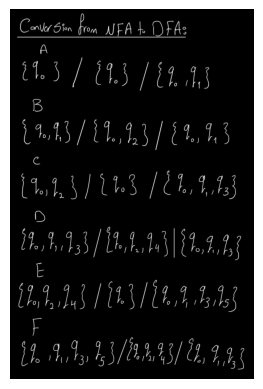

In [15]:
from skimage.io import imshow,imread
import matplotlib.pyplot as plt
img = imread('conversion.jpeg')
plt.figure()
plt.axis('off')
plt.imshow(img)
plt.show()

### DFA Design

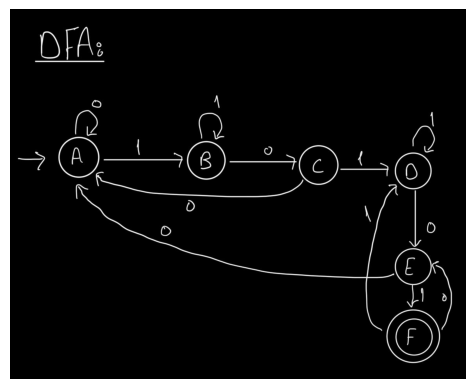

In [16]:
from skimage.io import imshow,imread
import matplotlib.pyplot as plt
img = imread('DFA.jpeg')
plt.figure()
plt.axis('off')
plt.imshow(img)
plt.show()

***

### DFA Class

***

In [17]:
class DFA:
	# Deterministic-Finite-Automata for detecting the pattern: (10101)
	def __init__(self,string_of_0s_1s):
		self.sigma = string_of_0s_1s
		self.iter = -1
		self.num_of_occurrences = 0
		self.Accepted = False

	def initiate(self):
		self.state_A()

	def state_A(self):
		self.iter += 1
		if self.sigma[self.iter] == '1':
			self.state_B()
		else:
			self.state_A()

	def state_B(self):
		self.iter += 1
		if len(self.sigma[self.iter:]) == 0:
			print("String not accepted")
		else:
			if self.sigma[self.iter] == '0': # changed for odd
				self.state_C()
			else:
				self.state_B()

	def state_C(self):
		self.iter += 1
		if len(self.sigma[self.iter:]) == 0:
			print("String not accepted")
		else:
			if self.sigma[self.iter] == '1': # changed for odd
				self.state_D()
			else:
				self.state_A() # overlapping...

	def state_D(self):
		self.iter += 1

		if len(self.sigma[self.iter:]) == 0:
			print("String not accepted")
		else:
			if self.sigma[self.iter] == '0': # changed for odd
				self.state_E()
			else:
				self.state_D()

	def state_E(self):
		self.iter += 1

		if len(self.sigma[self.iter:]) == 0:
			print("String not accepted")
		else:
			if self.sigma[self.iter] == '1': # changed for odd
				self.state_F()
			else:
				self.state_A()

	def state_F(self):
		self.iter += 1
		self.num_of_occurrences += 1
		if len(self.sigma[self.iter+1:]) == 0:
			print("String Accepted")
			self.Accepted = True
			return 0

		if self.sigma[self.iter] == '1':
			self.state_D() # overlapping...
		else:
			self.state_E() # overlapping...

	def DFA_count(self):
		if self.Accepted:
			print("Count: {}".format(self.num_of_occurrences))


# Testing Bench
TEST_1 = "101011"
TEST_2 = "11111"
TEST_3 = "10101010101"
TEST_4 = "110101011"

tests = [TEST_1,TEST_2,TEST_3,TEST_4]
for test in tests:
	dfa = DFA(test)
	dfa.initiate()
	dfa.DFA_count()



String Accepted
Count: 1
String not accepted
String Accepted
Count: 4
String Accepted
Count: 2
